$y(x) = \sin(0.5 \cdot \ln (x)  \cdot x) + 1 \rightarrow min$ 

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
def f(x):
    return math.sin(0.5 * math.log(x) * x) + 1

def painter_decorator(func):
    def draw(*args):
        p = func(*args)
        xx = np.arange(max(0.1, p - 10), p + 10, 0.05)
        yy = np.array([f(x) for x in xx])
        plt.plot(xx, yy)
        plt.scatter(p, f(p), c='r')
        plt.show()
    return draw

In [3]:
prev_step = 0
debug_list = []

def debug_start(l, r, *args):
    global prev_step, debug_list
    debug_list = [[l, r] + list(args) + [None]]
    prev_step = r - l

def debug_tick(l, r, *args):
    global prev_step, debug_list
    attitude = prev_step / (r - l)
    prev_step = r - l
    debug_list.append([l, r] + list(args) + [attitude])

def debug_result(*args):
    global debug_list
    args = list(args) + ['attitude']
    frame = pd.DataFrame(debug_list, columns=args)
    ord_args = args
    r_id = 1
    while r_id < len(args) - 1 and not ord_args[r_id + 1].startswith('f'):
        ord_args[r_id], ord_args[r_id + 1] = ord_args[r_id + 1], ord_args[r_id]
        r_id += 1
            
    return frame[ord_args]

In [4]:
@painter_decorator
def dichotomous_search(l, r, eps, s=1):
    debug_start(l, r, *[0, 0, 0, 0])
    delta = eps / 3
    
    while r - l > eps:
        m = (l + r) * .5
        x1 = m - delta
        x2 = m + delta
        if s*f(x1) > s*f(x2):
            l = x1
        else:
            r = x2
        debug_tick(l, r, *[x1, x2, f(x1), f(x2)])
    return (l + r) * .5          

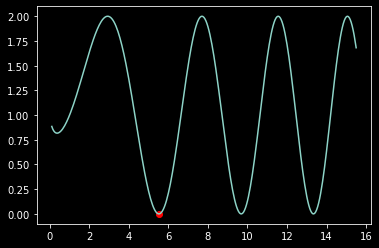

,l,x1,x2,r,f(x1),f(x2),attitude
0,2.0000,0.0000,0.0000,7.0000,0.0000,0.0000,NaN
1,4.4997,4.4997,4.5003,7.0000,0.7602,0.7594,1.9997
2,4.4997,5.7495,5.7502,5.7502,0.0495,0.0498,1.9995
3,5.1246,5.1246,5.1253,5.7502,0.1349,0.1345,1.9989
4,5.4370,5.4370,5.4377,5.7502,0.0060,0.0059,1.9979
5,5.4370,5.5933,5.5939,5.5939,0.0052,0.0053,1.9958
6,5.5152,5.5152,5.5158,5.5939,0.0000,0.0000,1.9915
7,5.5152,5.5542,5.5549,5.5549,0.0012,0.0013,1.9832
8,5.5152,5.5347,5.5354,5.5354,0.0003,0.0003,1.9670
9,5.5152,5.5249,5.5256,5.5256,0.0000,0.0001,1.9361


In [5]:
dichotomous_search(2, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [6]:
@painter_decorator
def golden_section_search(l, r, eps, s=1):
    d = lambda: gr * (r - l)
    gr = (math.sqrt(5) - 1) * .5
    x1, x2 = r - d(), l + d()
    f1, f2 = s*f(x1), s*f(x2)
    debug_start(l, r, *[x1, x2, f1, f2])
    while r - l > eps:
        if f1 > f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d()
            f2 = s*f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d()
            f1 = s*f(x1)
        debug_tick(l, r, *[x1, x2, f1, f2])
            
    return (l + r) * .5

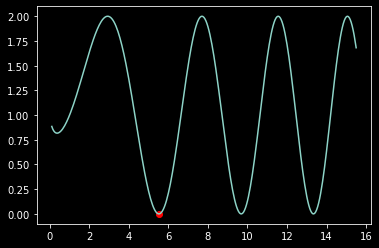

,l,x1,x2,r,f(x1),f(x2),attitude
0,2.0000,3.9098,5.0902,7.0000,1.4583,0.1585,NaN
1,3.9098,5.0902,5.8197,7.0000,0.1585,0.0839,1.6180
2,5.0902,5.8197,6.2705,7.0000,0.0839,0.4968,1.6180
3,5.0902,5.5410,5.8197,6.2705,0.0005,0.0839,1.6180
4,5.0902,5.3688,5.5410,5.8197,0.0201,0.0005,1.6180
5,5.3688,5.5410,5.6475,5.8197,0.0005,0.0155,1.6180
6,5.3688,5.4752,5.5410,5.6475,0.0017,0.0005,1.6180
7,5.4752,5.5410,5.5817,5.6475,0.0005,0.0037,1.6180
8,5.4752,5.5159,5.5410,5.5817,0.0000,0.0005,1.6180
9,5.4752,5.5004,5.5159,5.5410,0.0003,0.0000,1.6180


In [7]:
golden_section_search(2, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [8]:
@painter_decorator
def fibonacci_search(l, r, eps, s=1):
    fib = np.array([1, 1])
    while fib[-1] <= (r - l) / eps:
        fib = np.append(fib, fib[-1] + fib[-2])

    d = lambda k: (r - l) * (fib[n - k] / fib[n - k + 1])
    n = len(fib) - 1
    x1, x2 = r - d(1), l + d(1)
    f1, f2 = s*f(x1), s*f(x2)
    debug_start(l, r, *[x1, x2, f1, f2])
    for k in range(2, n):        
        if f1 > f2:
            l, x1, f1 = x1, x2, f2
            x2 = l + d(k)
            f2 = s*f(x2)
        else:
            r, x2, f2 = x2, x1, f1
            x1 = r - d(k)
            f1 = s*f(x1)
        debug_tick(l, r, *[x1, x2, f1, f2])
            
    return (l + r) * .5

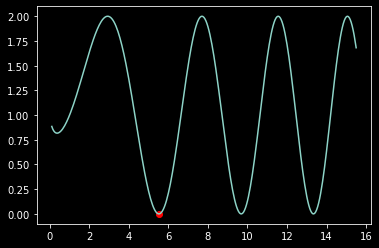

,l,x1,x2,r,f(x1),f(x2),attitude
0,2.0000,3.9098,5.0902,7.0000,1.4583,0.1585,NaN
1,3.9098,5.0902,5.8197,7.0000,0.1585,0.0839,1.6180
2,5.0902,5.8197,6.2705,7.0000,0.0839,0.4968,1.6180
3,5.0902,5.5410,5.8197,6.2705,0.0005,0.0839,1.6180
4,5.0902,5.3688,5.5410,5.8197,0.0201,0.0005,1.6180
5,5.3688,5.5410,5.6475,5.8197,0.0005,0.0155,1.6180
6,5.3688,5.4752,5.5410,5.6475,0.0017,0.0005,1.6180
7,5.4752,5.5410,5.5817,5.6475,0.0005,0.0037,1.6180
8,5.4752,5.5159,5.5410,5.5817,0.0000,0.0005,1.6181
9,5.4752,5.5004,5.5159,5.5410,0.0003,0.0000,1.6180


In [9]:
fibonacci_search(2, 7, 0.001)
debug_result(*['l', 'r', 'x1', 'x2', 'f(x1)', 'f(x2)'])

In [10]:
from scipy.interpolate import lagrange

@painter_decorator
def successive_parabolic_interpolation(l, m, r, eps, s=1):
    m, l, r = sorted([l, m, r], key=lambda x: f(x))
    if l > r:
        r, l = l, r

    # for lagrange
    xx = np.arange(l, r, 0.05)
    yy = np.array([f(x) for x in xx])
    paraboles = []
    
    f1, f2, f3 = s*f(l), s*f(m), s*f(r)
    debug_start(l, r, *[m, f1, f2, f3])
    while r - l > eps:
        p = ((m - l) ** 2) * (f2 - f3) - ((m - r) ** 2) * (f2 - f1)
        q = 2 * ((m - l) * (f2 - f3) - (m - r) * (f2 - f1))
        u = m - p / q
        fu = s*f(u)
        lagr = lagrange([l, m, r], [f1, f2, f3])
        paraboles.append(s*lagr(xx))
        if m > u:
            if f2 < fu:
                l, f1 = u, fu
            else:
                r, f3 = m, f2
                m, f2 = u, fu
        else:
            if f2 > fu:
                l, f1 = m, f2
                m, f2 = u, fu
            else:
                r, f3 = u, fu
        debug_tick(l, r, *[m, f1, f2, f3])
        
    p = (l + r) / 2
    plt.scatter(p, f(p), c='r')
    for i in paraboles:
        plt.plot(xx, i, c='w', linestyle='--', alpha=.3)
    plt.plot(xx, yy)
    plt.show()
    return p

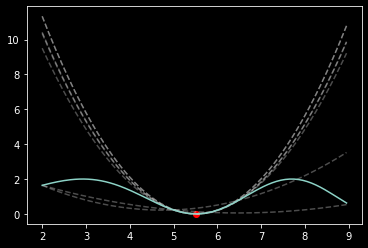

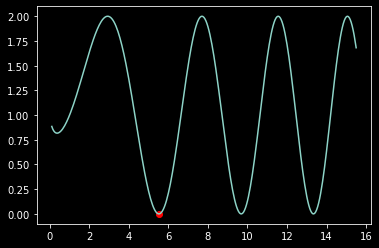

,l,m,r,f(l),f(m),f(r),attitude
0,2.0000,5.0000,9.0000,1.6390,0.2280,0.5536,NaN
1,2.0000,5.0000,6.4836,1.6390,0.2280,0.7785,1.5612
2,4.7532,5.0000,6.4836,0.4662,0.2280,0.7785,2.5910
3,5.0000,5.5015,6.4836,0.2280,0.0002,0.7785,1.1664
4,5.5015,5.5210,6.4836,0.0002,0.0000,0.7785,1.5107
5,5.5015,5.5186,5.5210,0.0002,0.0000,0.0000,50.5029
6,5.5015,5.5180,5.5186,0.0002,0.0000,0.0000,1.1387
7,5.5180,5.5180,5.5186,0.0000,0.0000,0.0000,26.6365


In [11]:
successive_parabolic_interpolation(2, 5, 9, 0.001)
debug_result(*['l', 'r', 'm', 'f(l)', 'f(m)', 'f(r)'])

In [12]:
@painter_decorator
def brents_method(l, r, eps, s=1):
    gr = (math.sqrt(5) - 1) / 2
    m = w = v = (l + r) / 2
    fm = fw = fv = s*f(m)
    d = e = r - l
    u = float('+inf')
    algo_type = None
    debug_start(l, r, *[m, w, v, fm, fw, fv, algo_type])
    while r - l > eps:
        g, e = e, d
        p = q = 0.0
        if len({m, w, v}) == len({fm, fw, fv}) == 3:
            p = ((m - w) ** 2) * (fm - fw) - ((m - v) ** 2) * (fm - fv)
            q = 2 * ((m - w) * (fm - fw) - (m - v) * (fm - fv))
            u = m - p / q
        
        if l + eps <= u <= r - eps and 2 * abs(u - m) < g:
            algo_type = 'spi'
            d = abs(u - m)        
        else:
            algo_type = 'gss'
            if m < (r + l) / 2:
                d = r - m
                u = m + gr * d
            else:            
                d = m - l
                u = m - gr * d
        
        if abs(u - m) < eps:
            u = m + np.sign(u - m) * eps / 2
        
        fu = s*f(u)

        if fu <= fm:
            if u >= m:
                l = m
            else:
                r = m
            v, w, m = w, m, u
            fv, fw, fm = fw, fm, fu
            
        else:
            if u >= m:
                r = u
            else:
                l = u
            
            if fu <= fw or w == m:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == m or v == w:
                v = u
                fv = fu

        debug_tick(l, r, *[m, w, v, fm, fw, fv, algo_type])
            
    return (l + r) / 2

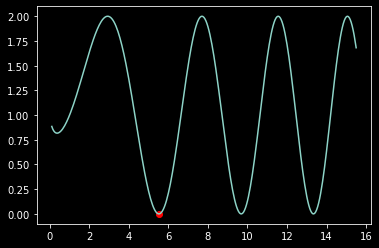

,l,m,w,v,r,f(m),f(w),f(v),algo_type,attitude
0,2.0000,4.5000,4.5000,4.5000,7.0000,0.7598,0.7598,0.7598,None,NaN
1,2.9549,4.5000,2.9549,4.5000,7.0000,0.7598,1.9996,0.7598,gss,1.2361
2,4.5000,6.0451,4.5000,2.9549,7.0000,0.2521,0.7598,1.9996,gss,1.6180
3,4.5000,5.0902,6.0451,4.5000,6.0451,0.1585,0.2521,0.7598,gss,1.6180
4,4.9505,5.0902,6.0451,4.9505,6.0451,0.1585,0.2521,0.2705,spi,1.4116
5,5.0902,5.4861,5.0902,6.0451,6.0451,0.0009,0.1585,0.2521,spi,1.1462
6,5.0902,5.4861,5.8316,5.0902,5.8316,0.0009,0.0906,0.1585,gss,1.2880
7,5.4111,5.4861,5.4111,5.8316,5.8316,0.0009,0.0104,0.0906,spi,1.7634
8,5.4111,5.4861,5.4111,5.6541,5.6541,0.0009,0.0104,0.0171,spi,1.7301
9,5.4111,5.4861,5.5900,5.4111,5.5900,0.0009,0.0048,0.0104,gss,1.3589


In [13]:
brents_method(2, 7, 0.001)
debug_result(*['l', 'r', 'm', 'w', 'v', 'f(m)', 'f(w)', 'f(v)', 'algo_type'])